In [30]:
# from ydata_profiling import ProfileReport
import seaborn as sns
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('train.csv')
df.head()
df.info()
# report = ProfileReport(df, title="Your Dataset Report")
# report.to_file("output.html")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


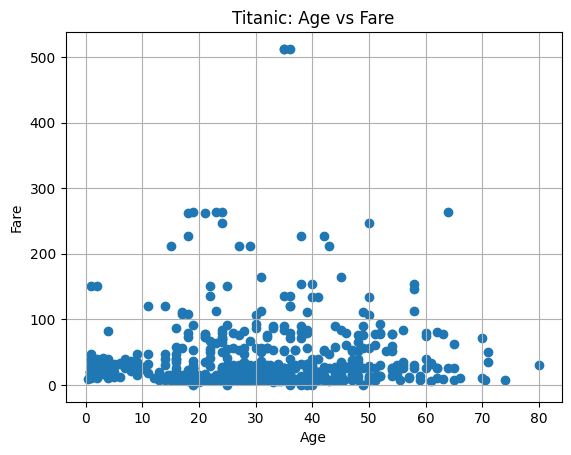

In [31]:
import matplotlib.pyplot as plt

# Drop rows with missing values in 'age' or 'fare'
nd = df.dropna(subset=['Age', 'Fare'])
# print(nd.head())
# Plot
# plt.figure(figsize=(10, 6))
plt.scatter(x=nd['Age'], y=nd['Fare'])
plt.title("Titanic: Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.grid(True)
plt.show()
# No relation found Between Age and Fare to fill missing value of Age

In [32]:
# Drop rows with missing values in key columns
df = df.dropna(subset=['Age', 'Embarked', 'Fare'])

# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

# One-hot encode categorical variables
df = pd.get_dummies(df[features + [target]], drop_first=True)
print(df.head())

   Pclass   Age  SibSp  Parch     Fare  Survived  Sex_male  Embarked_Q  \
0       3  22.0      1      0   7.2500         0      True       False   
1       1  38.0      1      0  71.2833         1     False       False   
2       3  26.0      0      0   7.9250         1     False       False   
3       1  35.0      1      0  53.1000         1     False       False   
4       3  35.0      0      0   8.0500         0      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
DTC = DecisionTreeClassifier(max_depth=4, random_state=42)
DTC.fit(X_train, y_train)

# Predict
y_pred = DTC.predict(X_test)

# Accuracy
accuracy_score(y_test, y_pred)


0.7062937062937062

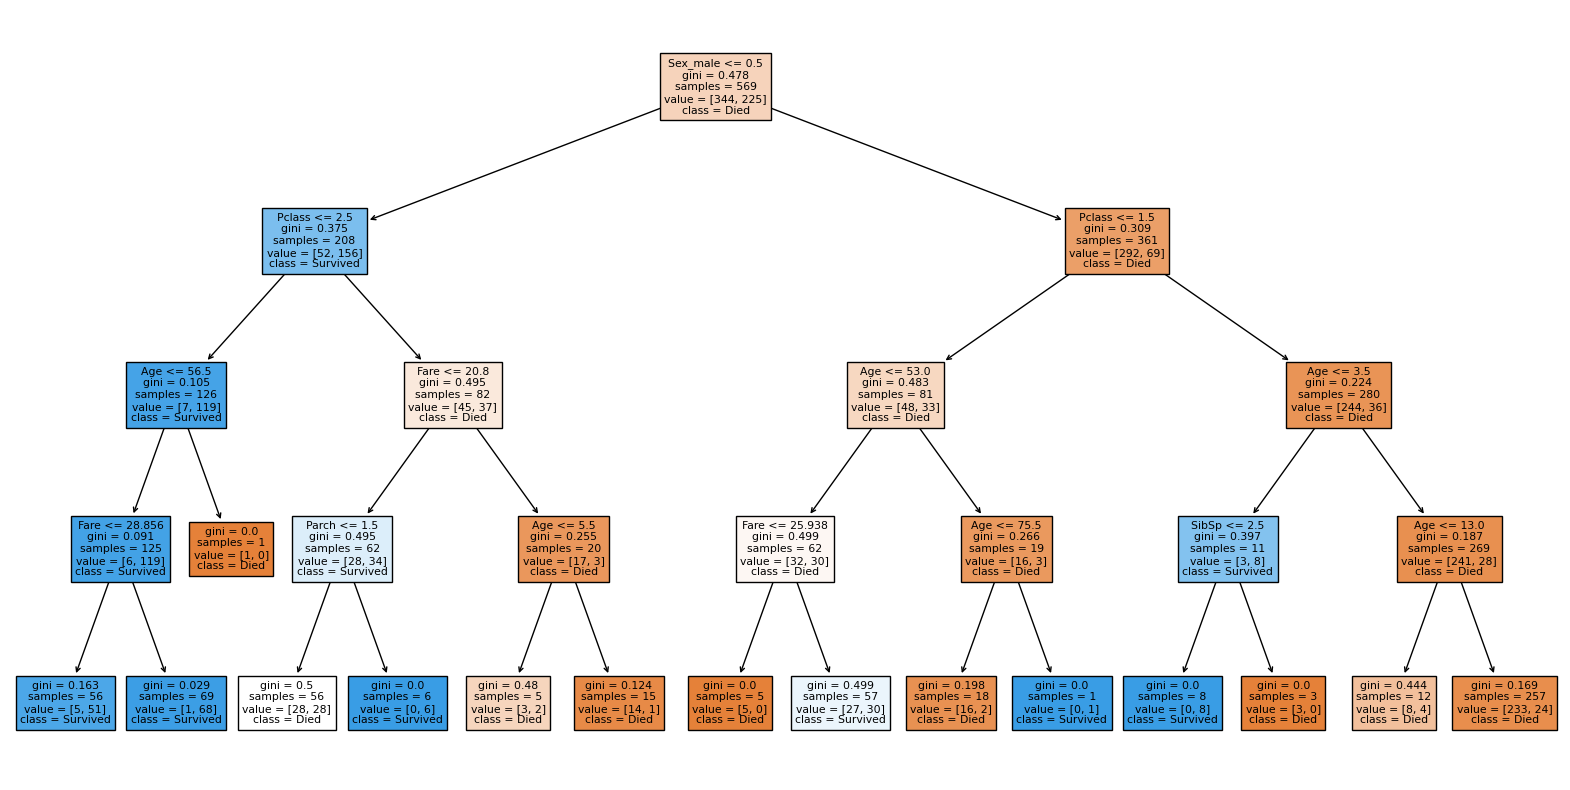

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)
plt.show()
